# 0. Importando Bibliotecas

In [107]:
# Manipulação de dataframes e vetores
import pandas as pd
import numpy as np

# Visualização de dados
import seaborn as sns
sns.set_palette('icefire')
import matplotlib.pyplot as plt
%matplotlib inline

# Modelagem
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 1. Entendendo os Dados

In [13]:
iris = pd.read_csv('Iris.csv')

In [15]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [18]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [21]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# 2. Data Viz

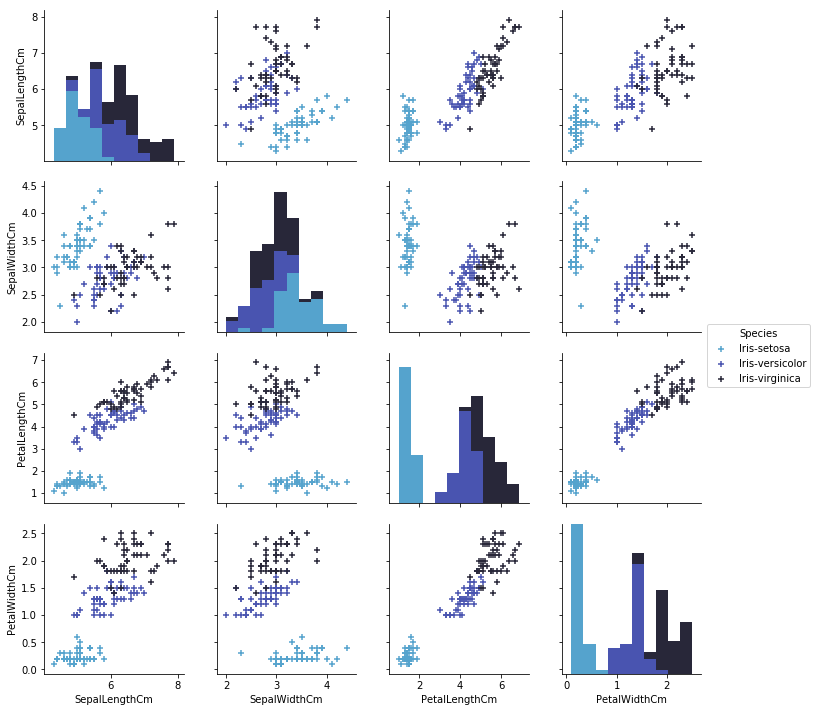

In [113]:
tmp = iris.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

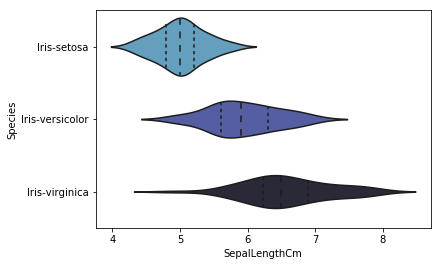

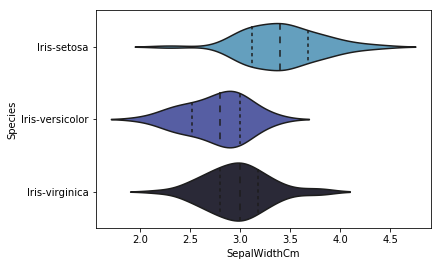

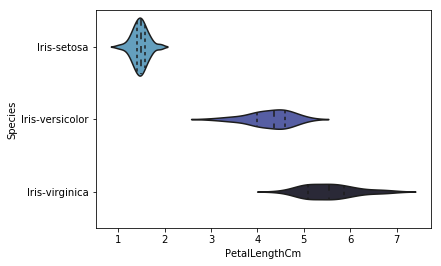

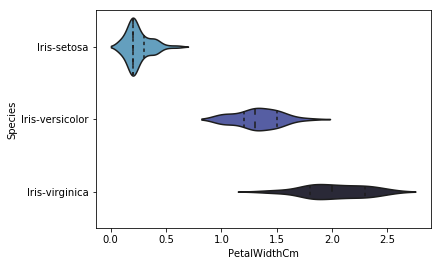

In [109]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=iris, inner='quartile')
plt.show()

# 3. Modelagem com Scikit-Learn

In [36]:
X = iris.drop(['Id', 'Species'], axis=1)
y = iris['Species']
print(X.head())
print(X.shape)
print(y.head())
print(y.shape)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
(150, 4)
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object
(150,)


### 3.1 Treinar e testar utilizando o mesmo dataset.

- Não é recomendando, pois o objetivo final é prever espécies (dados) que ainda não foram vistas antes pelo modelo.

- Há um alto risco de realizar um *overfit* dos seus dados.

#### KNN

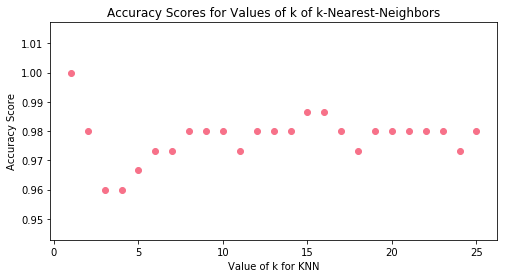

In [50]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))

plt.figure(figsize=(8,4))
plt.scatter(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

#### Regressão Logística

In [49]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.96


### Dividindo o dataset em um dataset de treino e de teste.

1. __Vantagens__:
    - Dividindo o dataset pseudo-randomicamente em dois sets separados, podemos utilizar um set para treino e outro set para teste.
    - Garante que não utilizaremos mesmas observações em ambos os sets.
    - Mais flexível e mais rápido que criar um modelo utilizando o dataset inteiro.
    
2. __Desvantagens__:
    - A acurácia dos set de testes pode variar dependendo de que observações estão contidas neste set.
    - Esta desvantagem pode ser combatida utilizando validação cruzada.
    - Ou seja, não há desvantagens :)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


#### KNN

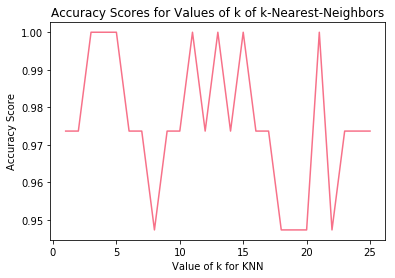

In [100]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()


#### Regressão Logística

In [91]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9466666666666667


# 4. Predição de valores

In [102]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[3, 4, 4, 7]])

array(['Iris-virginica'], dtype=object)